In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('train (1).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [18]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [19]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<AxesSubplot:>

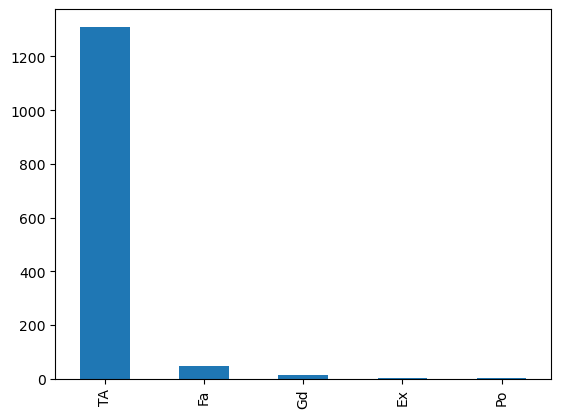

In [20]:
df['GarageQual'].value_counts().plot(kind='bar')

In [21]:
df['GarageQual'].mode() ##most occured value in GarageQual

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

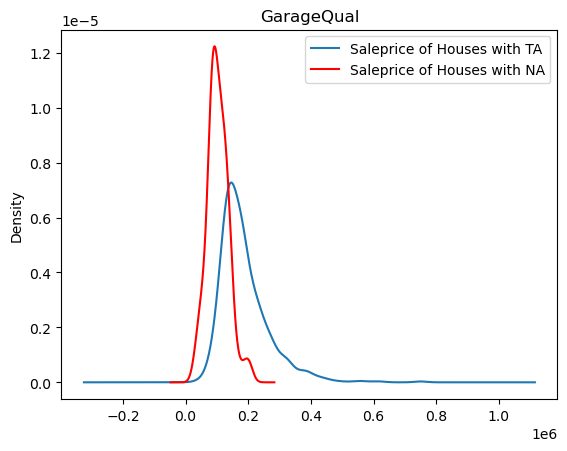

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Saleprice of Houses with TA', 'Saleprice of Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [24]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [26]:
df['GarageQual'].fillna('TA' ,inplace=True)

<AxesSubplot:>

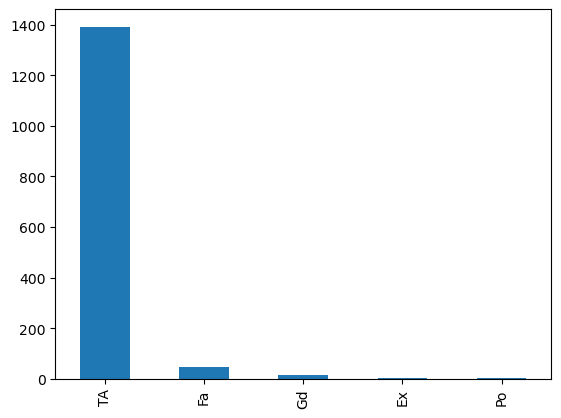

In [27]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

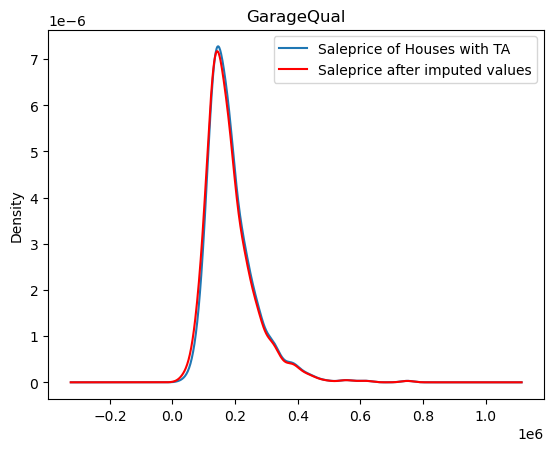

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

# distribution of the variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax,color='red')



lines, labels = ax.get_legend_handles_labels()
labels = ['Saleprice of Houses with TA', 'Saleprice after imputed values']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [31]:
# AS THEY OVERLAPP DISTRIBUTION : SAME HENCE WE CAN DO THIS IMPUTATION OF NA-->TA

<AxesSubplot:>

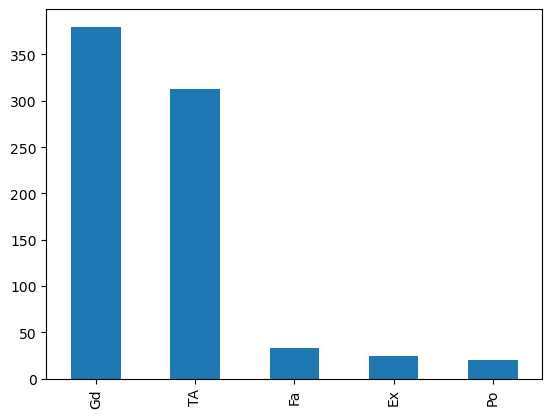

In [32]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [33]:
#GD AND TA IS ALMOST SIMILAR. GD IS NOT DOMINATING. CONDITION FOR MODE IMPUTATION NOT SATISTIED. STILL LET'S TRY

In [34]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'GarageQual')

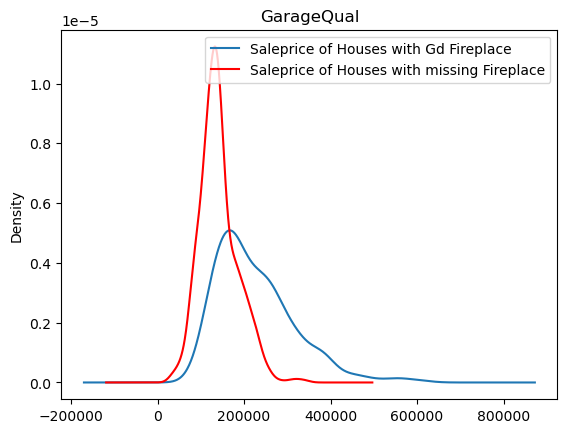

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Saleprice of Houses with Gd Fireplace', 'Saleprice of Houses with missing Fireplace']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [36]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

In [37]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<AxesSubplot:>

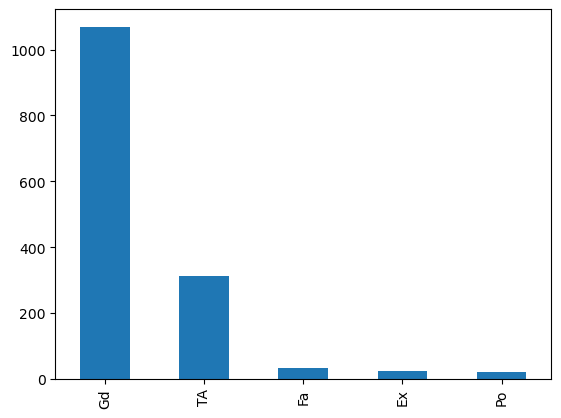

In [38]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

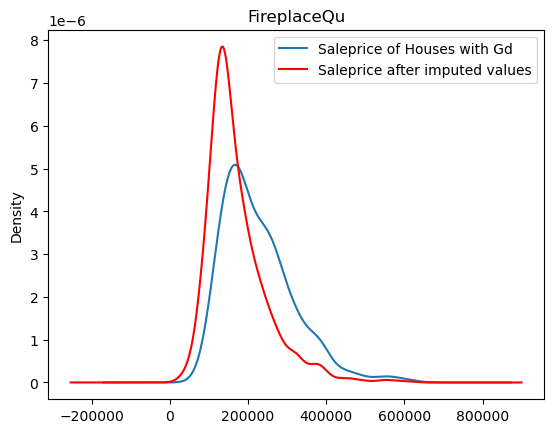

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax,color='red')



lines, labels = ax.get_legend_handles_labels()
labels = ['Saleprice of Houses with Gd', 'Saleprice after imputed values']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [40]:
#Distribution is not same!! Hence we cannot use mode imputer

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputer=SimpleImputer(strategy='most_frequent')

In [44]:
X_train=imputer.fit_transform(X_train)

In [45]:
X_test=imputer.transform(X_test)

In [47]:
imputer.statistics_  ##mode values 

array(['Gd', 'TA'], dtype=object)